In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import cross_validation
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split


import random

Problem 6: Problem 8 from Chapter 5.

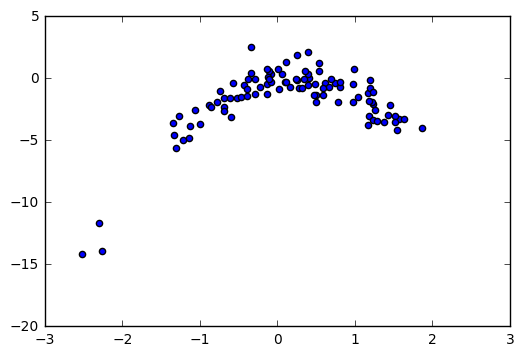

In [99]:
random.seed(2)
y = np.random.normal(0, 1, 100)
x = np.random.normal(0, 1, 100)

y = x - 2 * x**2 + np.random.normal(0, 1, 100)

plt.scatter(x, y)
plt.show()


****TODO: What is n and p?

****TODO: What is n and p

Part b) Well, it looks like a parabola! Makes sense, since it is -x^2.

****TODO: The rest of problem 6

Problem 7: Problem 9 from Chapter 6

In [100]:
college = pd.read_csv('College.csv')

y = college["Apps"]
x = college.drop("Apps", axis=1).drop("Private", axis=1)
x = x.loc[:,"Accept":]

Part a)

In [101]:
# 75% Train, 25% Test
x_train, x_test, y_train, y_test = train_test_split(x, y)

Part b) Linear Regression

In [102]:
clf = LinearRegression()
clf.fit(x_train, y_train);

test_error = mean_squared_error(y_test, clf.predict(x_test))
print 'Linear Regression MSE: ' + str(test_error)

Linear Regression MSE: 1238847.45154


Part c) Ridge Regression with CV

In [103]:
clf = RidgeCV()
clf.fit(x_train, y_train);

test_error = mean_squared_error(y_test, clf.predict(x_test))
print 'Ridge Regression with CV MSE: ' + str(test_error)

Ridge Regression with CV MSE: 1238885.60275


Part d) Lasso Model with CV

In [104]:
clf = LassoCV()
clf.fit(x_train, y_train);

test_error = mean_squared_error(y_test, clf.predict(x_test))
print 'Lasso with CV MSE: ' + str(test_error)

Lasso with CV MSE: 1448803.86814


Part e) PCR

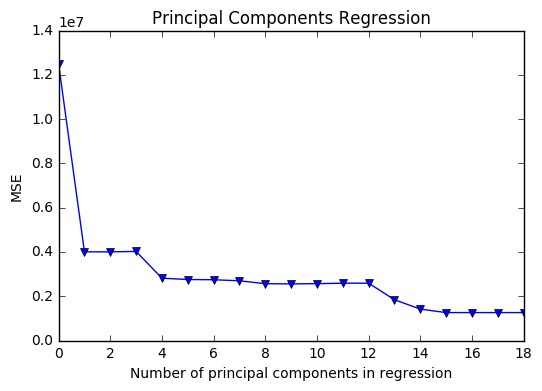

In [105]:
# Used this as reference: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab11/Lab%2011%20-%20PCR%20and%20PLS%20Regression%20in%20Python.pdf

pca = PCA()
X_reduced = pca.fit_transform(scale(x))

kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=1)

n = len(X_reduced)
regr = LinearRegression()
mse = []

# # Calculate MSE with only the intercept (no principal components in regression)
# score = -1*cross_validation.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='mean_squared_error').mean()
# mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*cross_validation.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
    
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(mse, '-v')
ax1.set_title("Principal Components Regression")
ax1.set_xlabel("Number of principal components in regression")
ax1.set_ylabel('MSE')

plt.show()

Note that the lowest cross validation error seems to occur at M = 14. We will select this for our CV

In [106]:
print 'MSE at M = 14: ' + str(mse[14])

MSE at M = 14: 1417532.03033


This MSE is comparabe to the other regression models. It is a little bit higher, which is expected, since we are using fewer dimensions/components.

Part f) PLS

In [118]:
mse = []
kf_10 = KFold(n_splits=10, shuffle=True)

x_train, x_test, y_train, y_test = train_test_split(x, y)
pls = PLSRegression(n_components=i, scale=True)



for i in np.arange(1, 17):
    pls.fit(x_train,y_train)
    score = -1*cross_val_score(pls, x_test, y_test, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
plt.plot(np.arange(0, 17), np.array(mse[0:17]), '-v')
plt.xlabel('Number of principal components in PLS regression')
plt.ylabel('MSE')
plt.show()

ValueError: x and y must have same first dimension